# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
data = pd.read_excel('geo.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [97]:
data = data.loc[:30000]

In [6]:
from sklearn.cluster import DBSCAN

In [161]:
db_default = DBSCAN(eps = 0.025, min_samples = 4).fit(data[['x','y']])

labels = db_default.labels_

In [162]:
DBSCAN(eps = 0.025, min_samples = 4).fit(data[['x','y']])

DBSCAN(algorithm='auto', eps=0.025, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

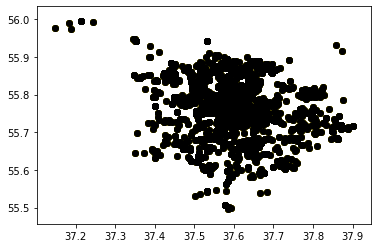

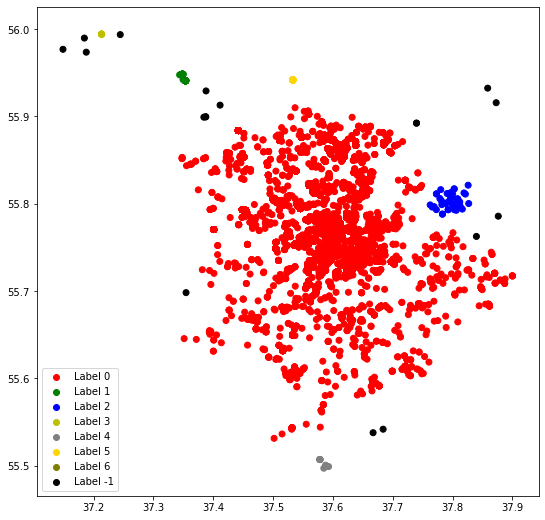

In [163]:
# Создание метки для сопоставления цветов

colours = {}

colours[0] = 'r'

colours[1] = 'g'

colours[2] = 'b'

colours[3] = 'y'

colours[4] = 'grey'

colours[5] = 'gold'

colours[6] = 'olive'

colours[-1] = 'k'

  
# Построение цветового вектора для каждой точки данных

cvec = [colours[label] for label in labels]

  
# Для построения легенды о сюжете

r = plt.scatter(data[['x']], data[['y']], color ='r');

g = plt.scatter(data[['x']], data[['y']], color ='g');

b = plt.scatter(data[['x']], data[['y']], color ='b');

y1 = plt.scatter(data[['x']], data[['y']], color ='y');

grey = plt.scatter(data[['x']], data[['y']], color ='grey');

gold = plt.scatter(data[['x']], data[['y']], color ='gold');

olive = plt.scatter(data[['x']], data[['y']], color ='olive');

k = plt.scatter(data[['x']], data[['y']], color ='k');

  
# Построение P1 на оси X и P2 на оси Y
# в соответствии с определенным вектором цвета

plt.figure(figsize =(9, 9))

plt.scatter(data[['x']], data[['y']], c = cvec)

  
# Построение легенды

plt.legend((r, g, b,y1,grey, gold, olive ,k), ('Label 0', 'Label 1', 'Label 2','Label 3','Label 4','Label 5' ,'Label 6', 'Label -1'))

  
plt.show()

In [122]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [164]:
# db_default = KMeans(n_clusters=3, random_state=5).fit(data[['x','y']])
db_default_1 = AgglomerativeClustering(n_clusters=7 ).fit(data[['x','y']])
labels_1 = db_default_1.labels_

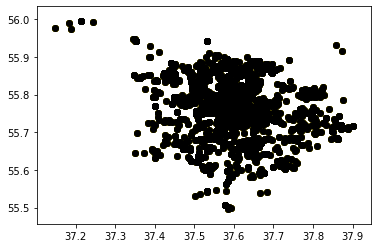

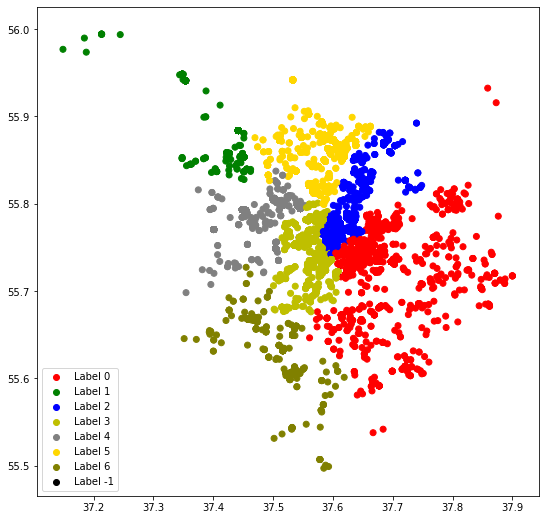

In [165]:
# Создание метки для сопоставления цветов

colours = {}

colours[0] = 'r'

colours[1] = 'g'

colours[2] = 'b'

colours[3] = 'y'

colours[4] = 'grey'

colours[5] = 'gold'

colours[6] = 'olive'

colours[-1] = 'k'

  
# Построение цветового вектора для каждой точки данных

cvec = [colours[label] for label in labels_1]

  
# Для построения легенды о сюжете

r = plt.scatter(data[['x']], data[['y']], color ='r');

g = plt.scatter(data[['x']], data[['y']], color ='g');

b = plt.scatter(data[['x']], data[['y']], color ='b');

y1 = plt.scatter(data[['x']], data[['y']], color ='y');

grey = plt.scatter(data[['x']], data[['y']], color ='grey');

gold = plt.scatter(data[['x']], data[['y']], color ='gold');

olive = plt.scatter(data[['x']], data[['y']], color ='olive');

k = plt.scatter(data[['x']], data[['y']], color ='k');

  
# Построение P1 на оси X и P2 на оси Y
# в соответствии с определенным вектором цвета

plt.figure(figsize =(9, 9))

plt.scatter(data[['x']], data[['y']], c = cvec)

  
# Построение легенды

plt.legend((r, g, b,y1,grey, gold, olive ,k), ('Label 0', 'Label 1', 'Label 2','Label 3','Label 4','Label 5' ,'Label 6', 'Label -1'))

  
plt.show()

In [166]:
db_default_2 = DBSCAN(eps = 0.025, min_samples = 4).fit(data[['comment_class']])

labels_2 = db_default_2.labels_

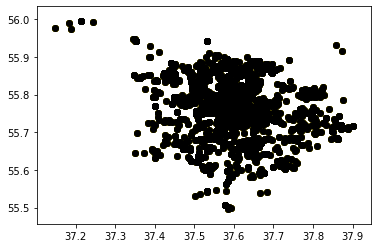

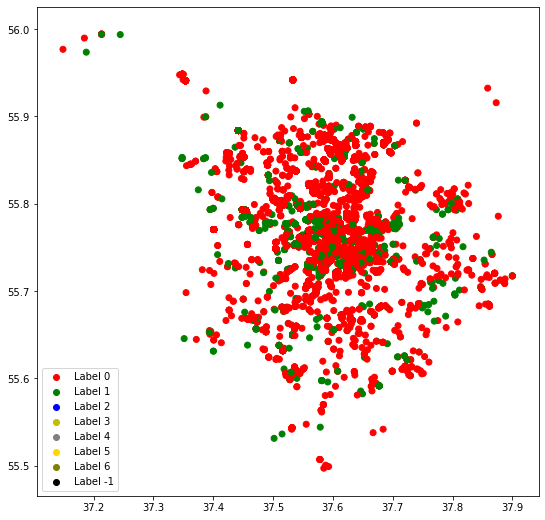

In [168]:
# Создание метки для сопоставления цветов

colours = {}

colours[0] = 'r'

colours[1] = 'g'

colours[2] = 'b'

colours[3] = 'y'

colours[4] = 'grey'

colours[5] = 'gold'

colours[6] = 'olive'

colours[-1] = 'k'

  
# Построение цветового вектора для каждой точки данных

cvec = [colours[label] for label in labels_2]

  
# Для построения легенды о сюжете

r = plt.scatter(data[['x']], data[['y']], color ='r');

g = plt.scatter(data[['x']], data[['y']], color ='g');

b = plt.scatter(data[['x']], data[['y']], color ='b');

y1 = plt.scatter(data[['x']], data[['y']], color ='y');

grey = plt.scatter(data[['x']], data[['y']], color ='grey');

gold = plt.scatter(data[['x']], data[['y']], color ='gold');

olive = plt.scatter(data[['x']], data[['y']], color ='olive');

k = plt.scatter(data[['x']], data[['y']], color ='k');

  
# Построение P1 на оси X и P2 на оси Y
# в соответствии с определенным вектором цвета

plt.figure(figsize =(9, 9))

plt.scatter(data[['x']], data[['y']], c = cvec)

  
# Построение легенды

plt.legend((r, g, b,y1,grey, gold, olive ,k), ('Label 0', 'Label 1', 'Label 2','Label 3','Label 4','Label 5' ,'Label 6', 'Label -1'))

  
plt.show()